# (Core) Preparing Time Series from Wide-Form Data

## Assignment



**Part 1**
- First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.
        - Note: it is a large file and may take a minute to load.
    - Filter the 4 largest cities into a new dataframe.
        - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            - Therefore the 4 largest cities would have rank values of [0,1,2,3]
    - Melt the data to long-form and prepare it for time series analysis.
        - Convert the melted dates into datetime datatype.
        - Make the datetime column the index.
    - Resample the dataframe as monthly frequency, grouped by City.


**Part 2**

   - Once you've prepared the dataframe with the time series data for the 4 largest cities:
        - Plot the home values for all 4 cities. (Hint: use unstack)
            - Make sure to add a title and axis labels.
            - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
                - Hint: use the FuncFormatter from matplotlib.
    
    - Answer the following 2 questions using pandas:
        - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
            - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
        - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
            - Hint: you can use .diff() to calculate the change in values

In [33]:
# Import

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import seaborn as sns
import datetime as dt
import os

## Part 1

In [2]:
# Load Data

df= pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [8]:
o_df=df.copy()

### Filter 4 Largest Cities

In [13]:
df= df[df['SizeRank'] <= 3]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [15]:
df.info(8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 281 columns):
 #    Column      Dtype  
---   ------      -----  
 0    RegionID    int64  
 1    SizeRank    int64  
 2    RegionName  object 
 3    RegionType  object 
 4    StateName   object 
 5    State       object 
 6    Metro       object 
 7    CountyName  object 
 8    2000-01-31  float64
 9    2000-02-29  float64
 10   2000-03-31  float64
 11   2000-04-30  float64
 12   2000-05-31  float64
 13   2000-06-30  float64
 14   2000-07-31  float64
 15   2000-08-31  float64
 16   2000-09-30  float64
 17   2000-10-31  float64
 18   2000-11-30  float64
 19   2000-12-31  float64
 20   2001-01-31  float64
 21   2001-02-28  float64
 22   2001-03-31  float64
 23   2001-04-30  float64
 24   2001-05-31  float64
 25   2001-06-30  float64
 26   2001-07-31  float64
 27   2001-08-31  float64
 28   2001-09-30  float64
 29   2001-10-31  float64
 30   2001-11-30  float64
 31   2001-12-31  float64
 32   2002-01-

### Melt the Data

In [18]:
melted= pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName',
                            'RegionType', 'StateName', 'State', 
                             'Metro', 'CountyName'],
               value_name= 'Price', var_name= 'Date')


melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [20]:
melted['Date']= pd.to_datetime(melted['Date'])

melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Price       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [21]:
# Making Date column the index

melted= melted.set_index('Date')

melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


### Resample DataFrame

- Monthly Frequency, Grouped by City

In [26]:
df_mon= melted.groupby('RegionName').resample('M').mean()

df_mon

/var/folders/5z/rbhjbxt93x56vw5bldr0n_900000gn/T/ipykernel_71412/3129883498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mon= melted.groupby('RegionName').resample('M').mean()
/var/folders/5z/rbhjbxt93x56vw5bldr0n_900000gn/T/ipykernel_71412/3129883498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mon= melted.groupby('RegionName').resample('M').mean()
/var/folders/5z/rbhjbxt93x56vw5bldr0n_900000gn/T/ipykernel_71412/3129883498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify

RegionID  SizeRank     Price
RegionName Date                                    
Chicago    2000-01-31   17426.0       3.0  166139.0
           2000-02-29   17426.0       3.0  166536.0
           2000-03-31   17426.0       3.0  167368.0
           2000-04-30   17426.0       3.0  168826.0
           2000-05-31   17426.0       3.0  170499.0
...                         ...       ...       ...
New York   2022-05-31    6181.0       0.0  768797.0
           2022-06-30    6181.0       0.0  773944.0
           2022-07-31    6181.0       0.0  777692.0
           2022-08-31    6181.0       0.0  779960.0
           2022-09-30    6181.0       0.0  781622.0

[1092 rows x 3 columns]

## Part 2

### Plot Home Values
- Plot the home values for all 4 cities. (Using Unstack)
    - Make sure to add a title and axis labels.
    - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
        - Hint: use the FuncFormatter from matplotlib.

In [27]:
unstacked= df_mon.unstack(level=0)

unstacked

RegionID                               SizeRank          \
RegionName  Chicago  Houston Los Angeles New York  Chicago Houston   
Date                                                                 
2000-01-31  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2000-02-29  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2000-03-31  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2000-04-30  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2000-05-31  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
...             ...      ...         ...      ...      ...     ...   
2022-05-31  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2022-06-30  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2022-07-31  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2022-08-31  17426.0  39051.0     12447.0   6181.0      3.0     2.0   
2022-09-30  17426.0  39051.0     12447.0   6181.0      3.0     2.0   

                                    Price                                  
RegionName Los Angeles New York   Chicago   Houston Los Angeles  New York  
Date                                                                       
2000-01-31         1.0      0.0  166139.0  109068.0    234181.0  253690.0  
2000-02-29         1.0      0.0  166536.0  109079.0    234401.0  255517.0  
2000-03-31         1.0      0.0  167368.0  108878.0    235513.0  257207.0  
2000-04-30         1.0      0.0  168826.0  108881.0    237589.0  260310.0  
2000-05-31         1.0      0.0  170499.0  108834.0    240113.0  263204.0  
...                ...      ...       ...       ...         ...       ...  
2022-05-31         1.0      0.0  312487.0  265558.0    990391.0  768797.0  
2022-06-30         1.0      0.0  314663.0  268901.0    992337.0  773944.0  
2022-07-31         1.0      0.0  315910.0  271059.0    992630.0  777692.0  
2022-08-31         1.0      0.0  315587.0  272400.0    978196.0  779960.0  
2022-09-30         1.0      0.0  315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

In [29]:
unstacked.columns

MultiIndex([('RegionID',     'Chicago'),
            ('RegionID',     'Houston'),
            ('RegionID', 'Los Angeles'),
            ('RegionID',    'New York'),
            ('SizeRank',     'Chicago'),
            ('SizeRank',     'Houston'),
            ('SizeRank', 'Los Angeles'),
            ('SizeRank',    'New York'),
            (   'Price',     'Chicago'),
            (   'Price',     'Houston'),
            (   'Price', 'Los Angeles'),
            (   'Price',    'New York')],
           names=[None, 'RegionName'])

In [39]:
def thousands(x,pos):
    new_x= x/1_000
    return f'{new_x:,.0f}K'

fmt_thous= mticks.FuncFormatter(thousands)

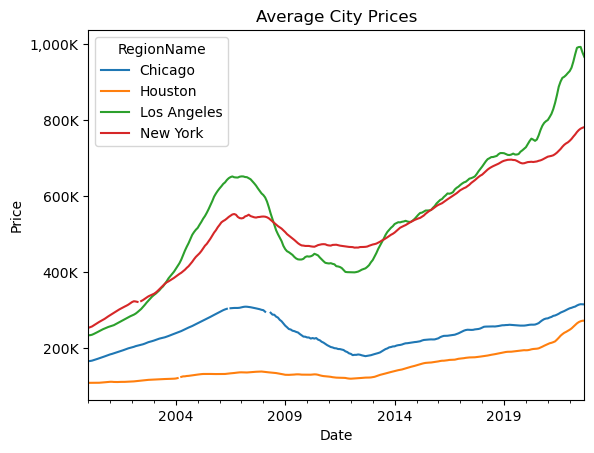

In [40]:
ax= unstacked['Price'].plot(title= 'Average City Prices', ylabel= 'Price')

ax.yaxis.set_major_formatter(fmt_thous)

### Answer Following 2 Questions

#### 1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?

- Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.  

In [54]:
df_mon.loc[pd.IndexSlice[:, '12/2008'],:]

,,RegionID,SizeRank,Price
RegionName,Date,,,
Chicago,2008-12-31,17426.0,3.0,265306.0
Houston,2008-12-31,39051.0,2.0,131283.0
Los Angeles,2008-12-31,12447.0,1.0,469294.0
New York,2008-12-31,6181.0,0.0,510309.0


- Highest 2008 Home Value
    - **New York:** $ 510,309.00
    

- Lowest 2008 Home Value
    - **Houston:** $ 131,283.00

#### 2. How much did the home values change from November 2008 to December 2008 (in dollars)?

- Hint: you can use .diff() to calculate the change in values

In [56]:
df_08diff = df_mon.diff()

df_08diff

RegionID  SizeRank   Price
RegionName Date                                  
Chicago    2000-01-31       NaN       NaN     NaN
           2000-02-29       0.0       0.0   397.0
           2000-03-31       0.0       0.0   832.0
           2000-04-30       0.0       0.0  1458.0
           2000-05-31       0.0       0.0  1673.0
...                         ...       ...     ...
New York   2022-05-31       0.0       0.0  6476.0
           2022-06-30       0.0       0.0  5147.0
           2022-07-31       0.0       0.0  3748.0
           2022-08-31       0.0       0.0  2268.0
           2022-09-30       0.0       0.0  1662.0

[1092 rows x 3 columns]

In [73]:
df_08diff.loc[pd.IndexSlice['11/2008':, '12/2008'],:]

,,RegionID,SizeRank,Price
RegionName,Date,,,
Chicago,2008-12-31,0.0,0.0,-5753.0
Houston,2008-12-31,0.0,0.0,-964.0
Los Angeles,2008-12-31,0.0,0.0,-12611.0
New York,2008-12-31,0.0,0.0,-4458.0


- Home Value Difference

    - **Chicago:** A drop of $ 5,753.00
    
    - **Houston:** A drop of $ 964.00
    
    - **Los Angeles:** A drop of $ 12,611.00
    
    - **New York:** A drop of $ 4,458.00